# COURSE: A deep understanding of deep learning
## SECTION: Running models on a GPU
### LECTURE: Implementation
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [2]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

# Select the processor device

In [ ]:
## Note: To run models on a GPU you must select from the menu:
#   -> Runtime
#     -> Change runtime type
#       -> Hardware accelerator
#         -> GPU

In [3]:
# use GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Build a simple model

In [4]:
net = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
      )

# Make some data

In [5]:
# just some random fluff
data   = torch.randn((1000,20)) # samples X features
labels = torch.randint(low=0,high=2,size=(1,1000))

In [10]:
print(data.shape)
print(labels.shape)

torch.Size([1000, 20])
torch.Size([1, 1000])


# Send the model and the data to the GPU

In [11]:
# model
net.to(device)

# data
data   = data.to(device)
labels = labels.to(device)

In [12]:
data

tensor([[-0.7890,  0.8228, -0.6708,  ...,  0.0193,  0.8655, -0.5891],
        [ 0.0700,  0.3299, -0.8609,  ...,  1.0731, -0.1072, -1.3965],
        [-0.0698,  1.5783, -0.5611,  ..., -0.6901,  1.9648,  1.4868],
        ...,
        [ 0.8946,  0.0981, -1.4806,  ..., -0.2586, -2.6338,  0.5801],
        [-0.6377,  1.3793,  1.4326,  ...,  0.0877,  0.3335, -1.4778],
        [ 0.5609,  1.4846,  0.2757,  ..., -0.5523,  0.0324,  0.3183]],
       device='cuda:0')

In [13]:
# you can also create data directly on the GPU
dataG = torch.randn((1000,20),device=device)
dataC = torch.randn((1000,20),device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cuda:0
cuda:0
cpu


# Getting results from the model

In [14]:
output = net(data)

In [15]:
output.device

device(type='cuda', index=0)

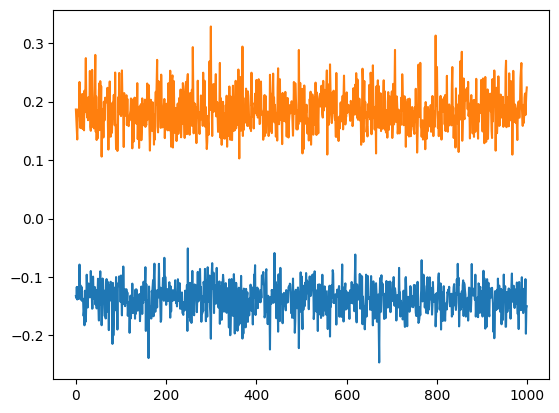

In [17]:
# try to plot the data
# plt.plot(output.detach());

plt.plot(output.detach().cpu());

# Experiment: Computation time

In [18]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cuda:0'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
GPUtime = 1000*(time.process_time() - starttime)

In [19]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cpu'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
CPUtime = 1000*(time.process_time() - starttime)

In [20]:
# time in ms
[CPUtime,GPUtime]

[9.54675599999888, 3.052621000000144]

In [ ]:
# but maybe "sending" it to the CPU takes too much overhead?

In [21]:
# recreate network and data
net  = nn.Sequential(nn.Linear(20,100),nn.ReLU(),nn.Linear(100,500),nn.ReLU(),nn.Linear(500,30),nn.ReLU(),nn.Linear(30,2))
data = torch.randn((1000,20))

# rerun the experiment
starttime = time.process_time()
output    = net(data).detach()
CPUtime2  = 1000*(time.process_time() - starttime)

# report the results
[CPUtime2,CPUtime,GPUtime]

[4.739659000000174, 9.54675599999888, 3.052621000000144]

In [23]:
print(labels.shape)
print(output.shape)

torch.Size([1, 1000])
torch.Size([1000, 2])
